
## Objectives
In this lab, we will :
1. Send assets across blockchains : Goerli (Ethereum testnet) to Mumbai (Polygon testnet)
2. Understand how LayerZero bridges tokens from the mainnet to the testnet
3. Interact with the wrapped ETH smart contract
4. Deploy and interact with a smart contract that wraps ERC-20 tokens (LabETH)

## Send assets across different blockchains

The objective here is to get a wrapped version of ETH tokens on the Mumbai chain. To do this, we follow these steps :
1. Go to the GUI for the [bridge between Goerli and Mumbai](https://wallet-dev.polygon.technology/polygon/bridge/deposit) and connect your MetaMask.
2. Select ETH token in the "From" field.
3. Enter the amount of ETH you wish to transfer - say 0.01 ETH.
4. Click Transfer.
5. Confirm the transaction via MetaMask. 

You can also view your transaction on Etherscan. It will transfer your ETH to a [certain smart contract](https://goerli.etherscan.io/address/0xcfa4746e2ffa649ede74c78c30be0bd7860e54c2) that is supposed to notify a committe of bridge managers (who are off-chain) that a transaction has happened on one chain (Goerli/Ethereum). The committee then votes on approving a set of corresponding transactions on the other chain (Mumbai/Polygon).

## Understanding how LayerZero works

We saw a few weeks ago that the gas prices on Goerli spiked suddenly. One of the causes of the spike was the LayerZero bridge between the Ethereum mainnet and the Goerli testnet. This was to allow large protocol developers to buy GoerliETH to test out their contracts. Although initially the gas prices might have been high continously since many major protocols were testing their contracts out. But now, the gas jumps seem to be more sporadic.

[This is the testnet bridge website](https://testnetbridge.com/) and its smart contract deployed on Goerli is [this](https://testnetbridge.com/how). The contract swaps the native token on each net (ETH on mainnet and GoerliETH on goerli) with a wrapped version of the token on the destination net (GETH on mainnet and METH on goerli). [There is a uniswap pool](https://testnetbridge.com/pools) between METH and GoerliETH on the Goerli testnet. Similarly, there is a pool between GETH and ETH on the mainnet. Each of these wrapped tokens have a bridge that is managed by LayerZero's validators that mint tokens on destination chain when respective tokens are deposited on one chain. For instance, when METH is sent to the bridge on Goerli, it gives ETH on mainnet to the corresponding address.

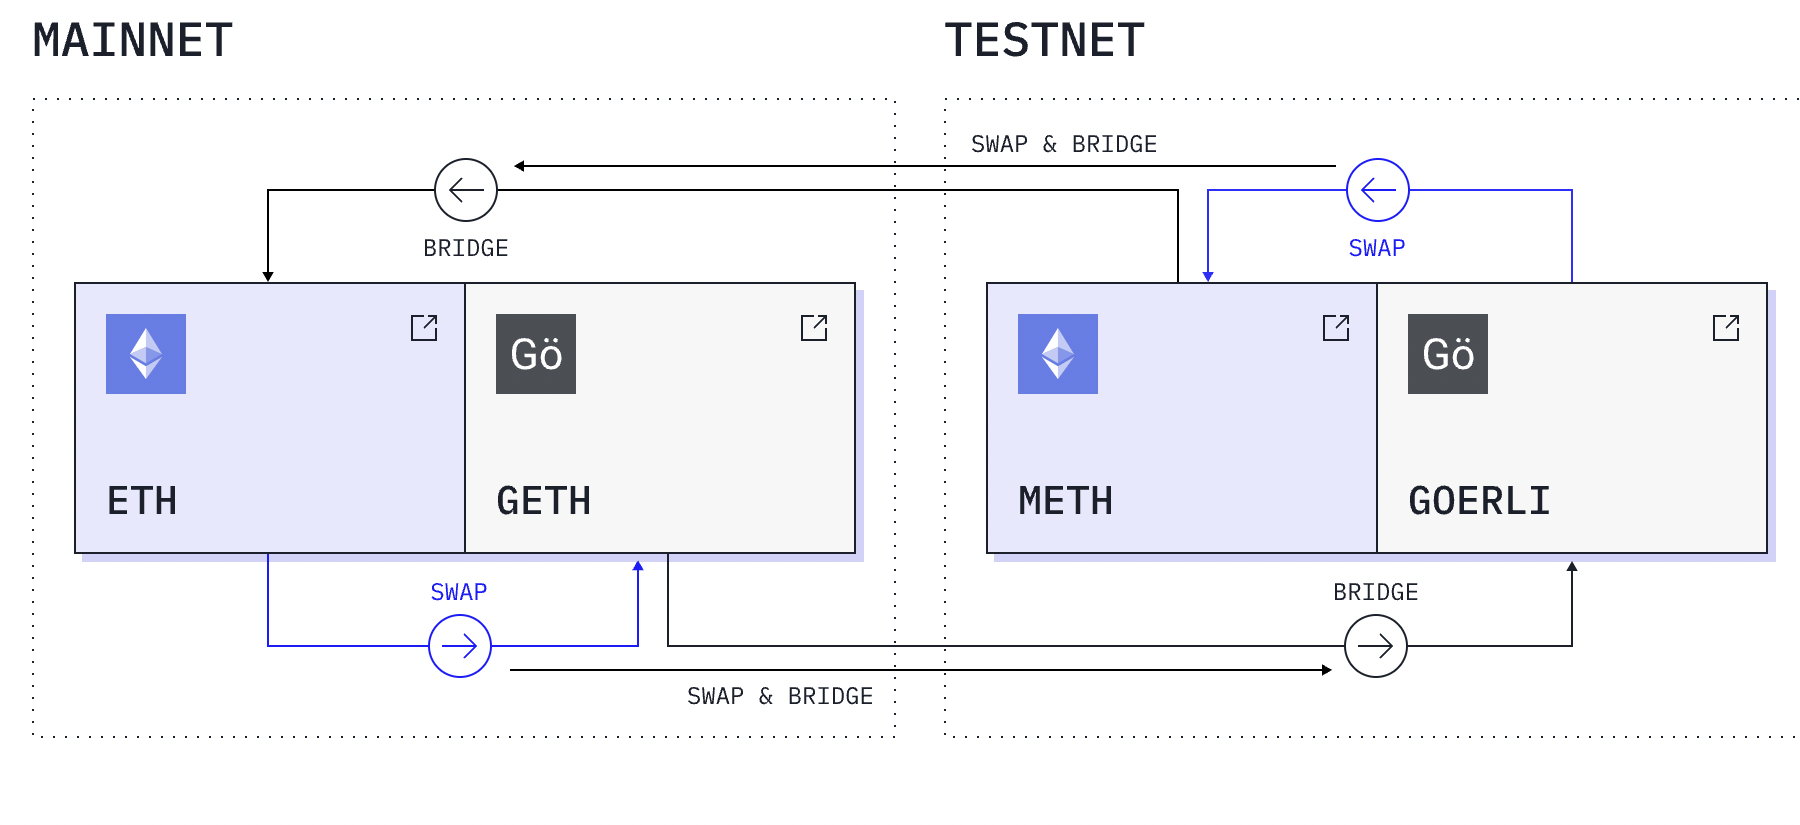

## Interaction with wrapped ETH contract

ETH is not an ERC-20 token, which is why many protocols use wrapped ETH (WETH) instead. The contract for converting ETH to WETH is [here](https://goerli.etherscan.io/address/0xccb14936c2e000ed8393a571d15a2672537838ad).

1. Go to Write Contract
2. Deposit 0.01 ETH in the contract
3. Check your WETH balance - you should have the same amount of WETH.
4. Use the withdraw function to get your ETH back.

## Wrapping LabETH token

The process of wrapping ERC20 tokens themselves is essential for utilizing them within the Ethereum ecosystem for staking, governance, and other actions. This is primarily due to the different token standards and functionalities they possess. 

Wrapping ERC20 tokens allows users to convert them into a compatible format for a particular protocol, generally referred to as wrapped tokens. This conversion is crucial for staking purposes, as many decentralized finance (DeFi) platforms and protocols require tokens to be in a specific format to participate in staking pools, liquidity provision, or yield farming.

Moreover, wrapped tokens facilitate a more streamlined governance process within decentralized autonomous organizations (DAOs) and other blockchain projects. By ensuring compatibility with various smart contracts and decentralized applications (dApps) on the Ethereum network, wrapped tokens enable users to participate in voting, proposal submission, and other governance-related actions with greater ease.

Let us assume you want to wrap the LabETH token. Given below is an incomplete contract that you should fill in.

```javascript

pragma solidity >=0.8.0 <0.9.0;
//SPDX-License-Identifier: MIT

import "@openzeppelin/contracts/token/ERC20/ERC20.sol";

contract ERC20Wrapper is ERC20 {
     address _underlying;

    constructor(address underlyingToken) ERC20("Wrapped LETH", "WLETH") {
        require(underlyingToken != address(this), "ERC20Wrapper: cannot self wrap");
        _underlying = underlyingToken;
    }

    /**
     * TODO : Fill in the numbered variables
     */
    function deposit(uint256 amount) public virtual  {
        address sender = _msgSender();
        ERC20(_1_).transferFrom(_2_, _3_, _4_);
        _mint(_5_, _6_);
    }

    /**
     * TODO : Fill in the numbered variables
     */
    function withdraw(uint256 amount) public virtual  {
        address sender = _msgSender();
        _burn(_7_, _8_);
        ERC20(_1_).transfer(_9_, _10_);
    }

    
}



1. Copy and paste the above contract into a new file in [Remix](https://remix.ethereum.org/).
2. Fill in the deposit and withdraw functions.
3. Try to deploy the contract with the underlyingToken being [LabETH](https://goerli.etherscan.io/address/0xb85154E1948e52214A5F134172358Fb5010F6282).
4. Submit your answers for each blank value in the above code at [this link](https://forms.gle/QKF9SdFA8Xrzuoey9).
5. If you were able to deploy your contract, perform a deposit transaction - do you need to do something else before your deposit transaction goes through?
6. Do a withdraw transaction as well.